<h1 style="background-color: #ffe4e1; color: #333; padding: 15px; border: 2px solid #ff82ab; border-radius: 15px; text-align: center; font-family: Verdana, sans-serif;">
    Importing Libraries & Loan Dataset
</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [2]:
df=pd.read_csv('/kaggle/input/loan-bank/bank-loan.csv')

In [3]:
df

loan_id  age           job   marital  education  Gender default  \
0            1   58    management   married   tertiary  Female      no   
1            2   44    technician    single  secondary  Female      no   
2            3   33  entrepreneur   married  secondary  Female      no   
3            4   47   blue-collar   married    unknown    Male      no   
4            5   33       unknown    single    unknown  Female      no   
...        ...  ...           ...       ...        ...     ...     ...   
45206    45207   51    technician   married   tertiary  Female      no   
45207    45208   71       retired  divorced    primary  Female      no   
45208    45209   72       retired   married  secondary  Female      no   
45209    45210   57   blue-collar   married  secondary  Female      no   
45210    45211   37  entrepreneur   married  secondary  Female      no   

      housing   income_annum   loan_amount   loan_term  \
0         yes        9600000      29900000          12   
1         yes        4100000      12200000           8   
2         yes        9100000      29700000          20   
3         yes        8200000      30700000           8   
4          no        9800000      24200000          20   
...       ...            ...           ...         ...   
45206      no        6804720        476733           2   
45207      no        7036170       5767923          17   
45208      no        1741390      15039408           3   
45209      no        6045848      37563558          18   
45210      no        9785458      19971609           1   

        residential_assets_value   commercial_assets_value  \
0                        2400000                  17600000   
1                        2700000                   2200000   
2                        7100000                   4500000   
3                       18200000                   3300000   
4                       12400000                   8200000   
...                          ...                       ...   
45206                   21949696                  16062378   
45207                   11490721                  16141821   
45208                    2128640                   4679178   
45209                   14186322                  17266281   
45210                   17615323                   3837329   

        luxury_assets_value   bank_asset_value   cibil_score  loan_status  \
0                  22700000            8000000           778     Approved   
1                   8800000            3300000           417     Rejected   
2                  33300000           12800000           506     Rejected   
3                  23300000            7900000           467     Rejected   
4                  29400000            5000000           382     Rejected   
...                     ...                ...           ...          ...   
45206               6928734            4684139           501     Rejected   
45207              21943414            5131647           558     Rejected   
45208              35380397            9975071           532     Rejected   
45209              21258587            1529223           826     Approved   
45210               3847627           10858236           764     Approved   

       balance  
0         2143  
1           29  
2            2  
3         1506  
4            1  
...        ...  
45206      825  
45207     1729  
45208     5715  
45209      668  
45210     2971  

[45211 rows x 18 columns]

In [4]:
df.isnull().sum()

loan_id                      0
age                          0
job                          0
marital                      0
education                    0
Gender                       0
default                      0
housing                      0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 cibil_score                 0
 loan_status                 0
balance                      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    45211 non-null  int64 
 1   age                        45211 non-null  int64 
 2   job                        45211 non-null  object
 3   marital                    45211 non-null  object
 4   education                  45211 non-null  object
 5   Gender                     45211 non-null  object
 6   default                    45211 non-null  object
 7   housing                    45211 non-null  object
 8    income_annum              45211 non-null  int64 
 9    loan_amount               45211 non-null  int64 
 10   loan_term                 45211 non-null  int64 
 11   residential_assets_value  45211 non-null  int64 
 12   commercial_assets_value   45211 non-null  int64 
 13   luxury_assets_value       45211 non-null  int64 
 14   bank_

In [6]:
df.columns

Index(['loan_id', 'age', 'job', 'marital', 'education', 'Gender', 'default',
       'housing', ' income_annum', ' loan_amount', ' loan_term',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' cibil_score',
       ' loan_status', 'balance'],
      dtype='object')

In [7]:
df.head()

loan_id  age           job  marital  education  Gender default housing  \
0        1   58    management  married   tertiary  Female      no     yes   
1        2   44    technician   single  secondary  Female      no     yes   
2        3   33  entrepreneur  married  secondary  Female      no     yes   
3        4   47   blue-collar  married    unknown    Male      no     yes   
4        5   33       unknown   single    unknown  Female      no      no   

    income_annum   loan_amount   loan_term   residential_assets_value  \
0        9600000      29900000          12                    2400000   
1        4100000      12200000           8                    2700000   
2        9100000      29700000          20                    7100000   
3        8200000      30700000           8                   18200000   
4        9800000      24200000          20                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

    cibil_score  loan_status  balance  
0           778     Approved     2143  
1           417     Rejected       29  
2           506     Rejected        2  
3           467     Rejected     1506  
4           382     Rejected        1

In [8]:
df.columns

Index(['loan_id', 'age', 'job', 'marital', 'education', 'Gender', 'default',
       'housing', ' income_annum', ' loan_amount', ' loan_term',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' cibil_score',
       ' loan_status', 'balance'],
      dtype='object')

In [9]:
columns_cov=[' income_annum', ' loan_amount', ' residential_assets_value', ' commercial_assets_value',' luxury_assets_value', ' bank_asset_value']
for column in columns_cov:
    df[column]=df[column]/100000

<h1 style="background-color: #ffe4e1; color: #333; padding: 15px; border: 2px solid #ff82ab; border-radius: 15px; text-align: center; font-family: Verdana, sans-serif;">
   Exploratory Data Analysis (EDA)
</h1>

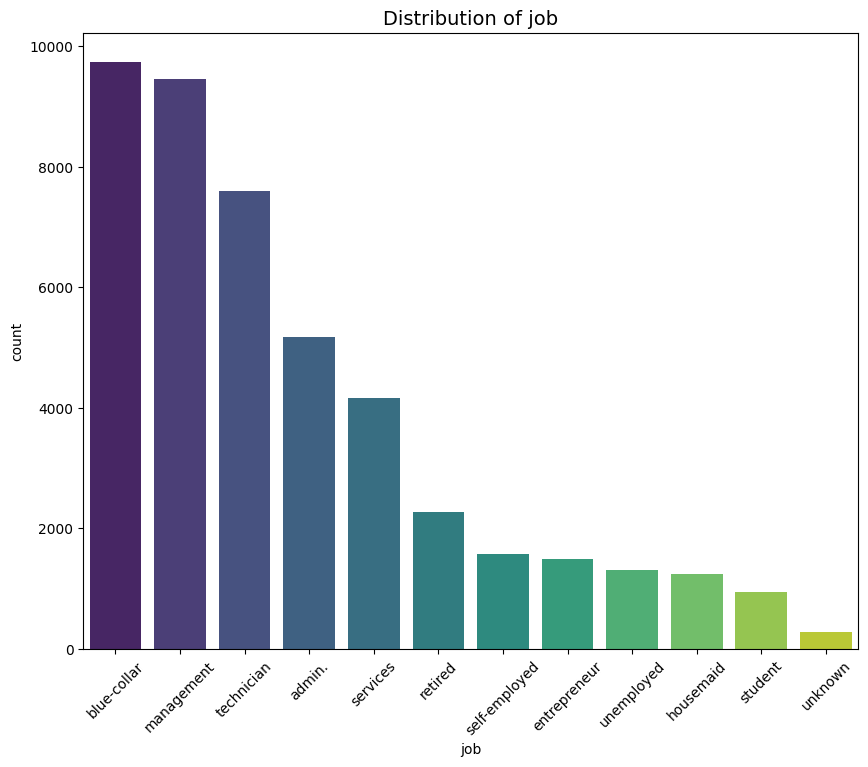

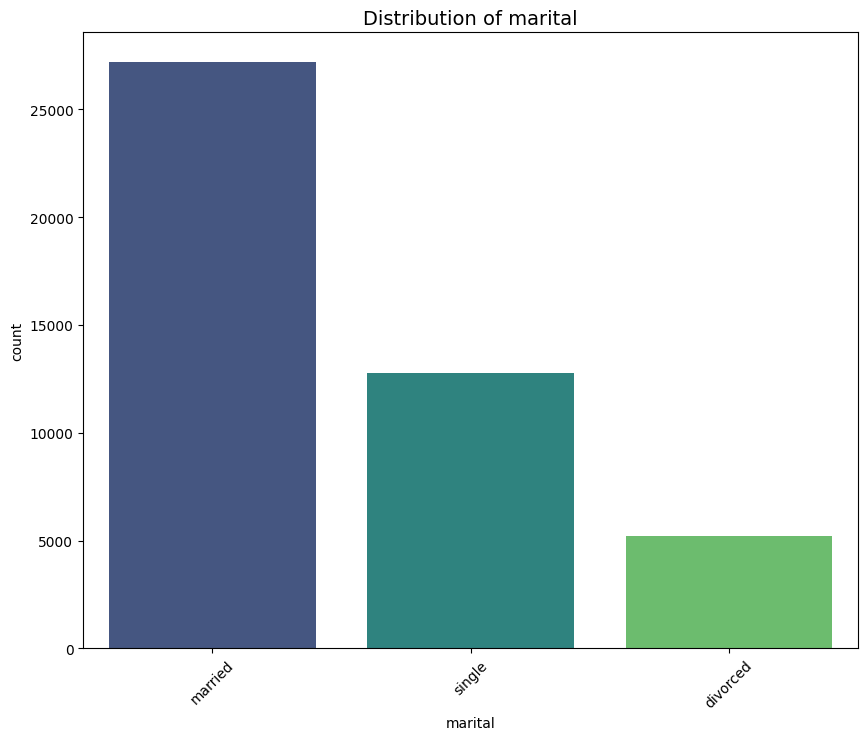

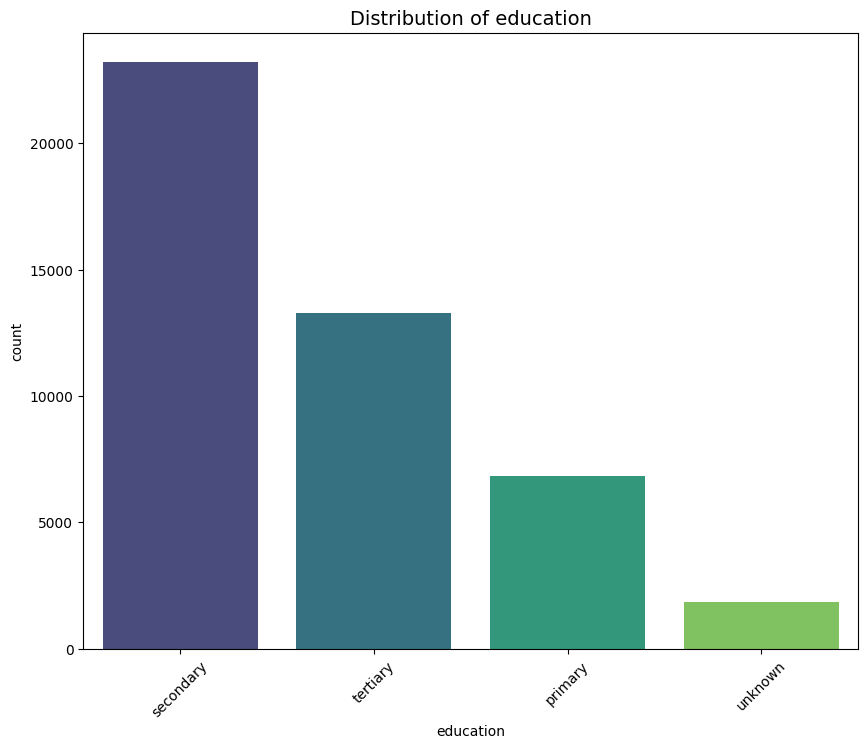

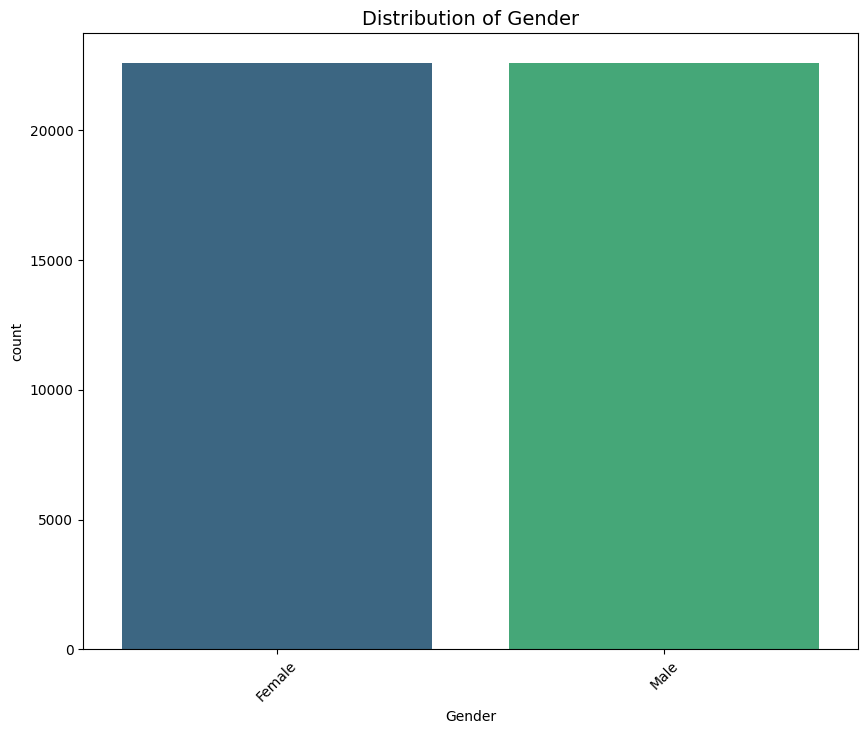

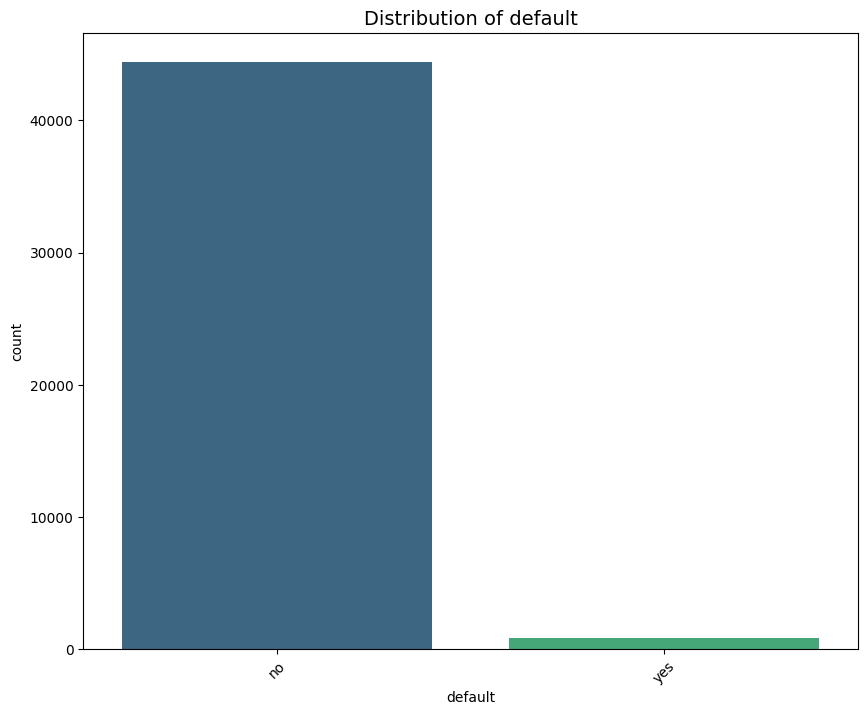

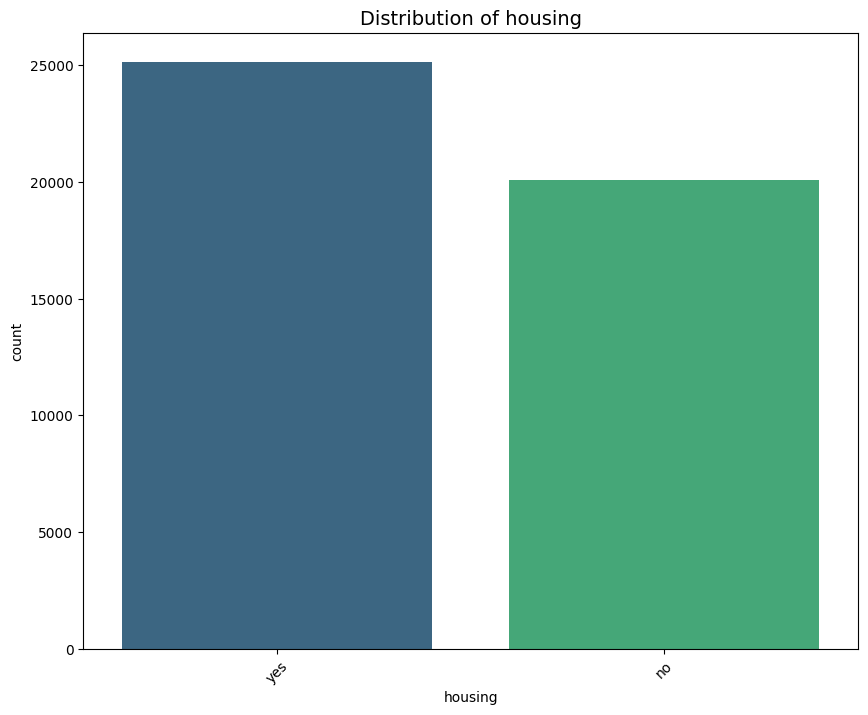

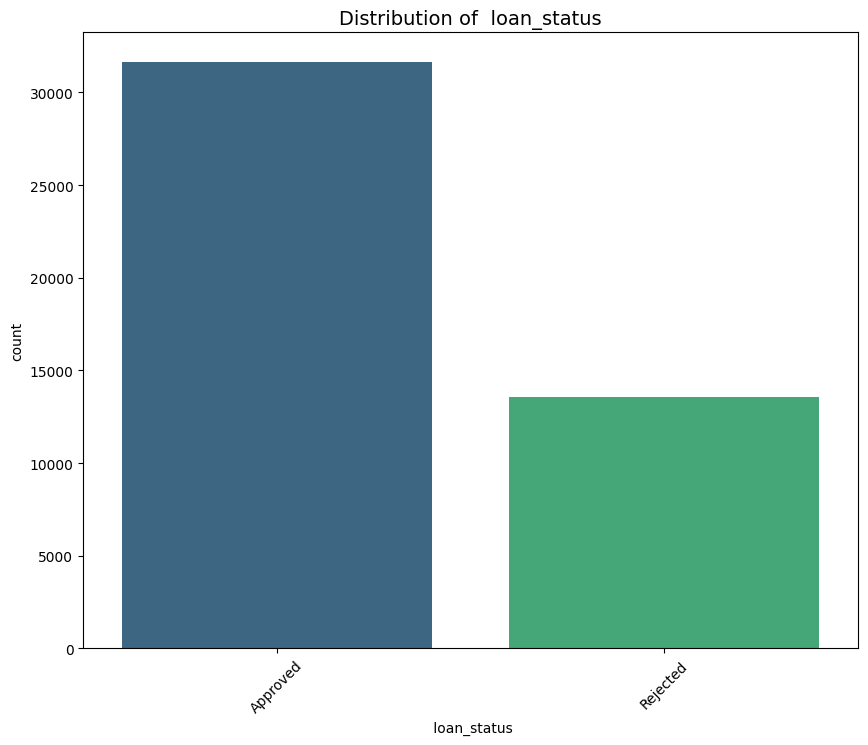

In [10]:
categorical_col=['job', 'marital', 'education', 'Gender', 'default',
       'housing',' loan_status']
for col in categorical_col:
    plt.figure(figsize=(10,8))
    sns.countplot(data=df,x=col,palette="viridis",order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}',fontsize=14)
    plt.xticks(rotation=45)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


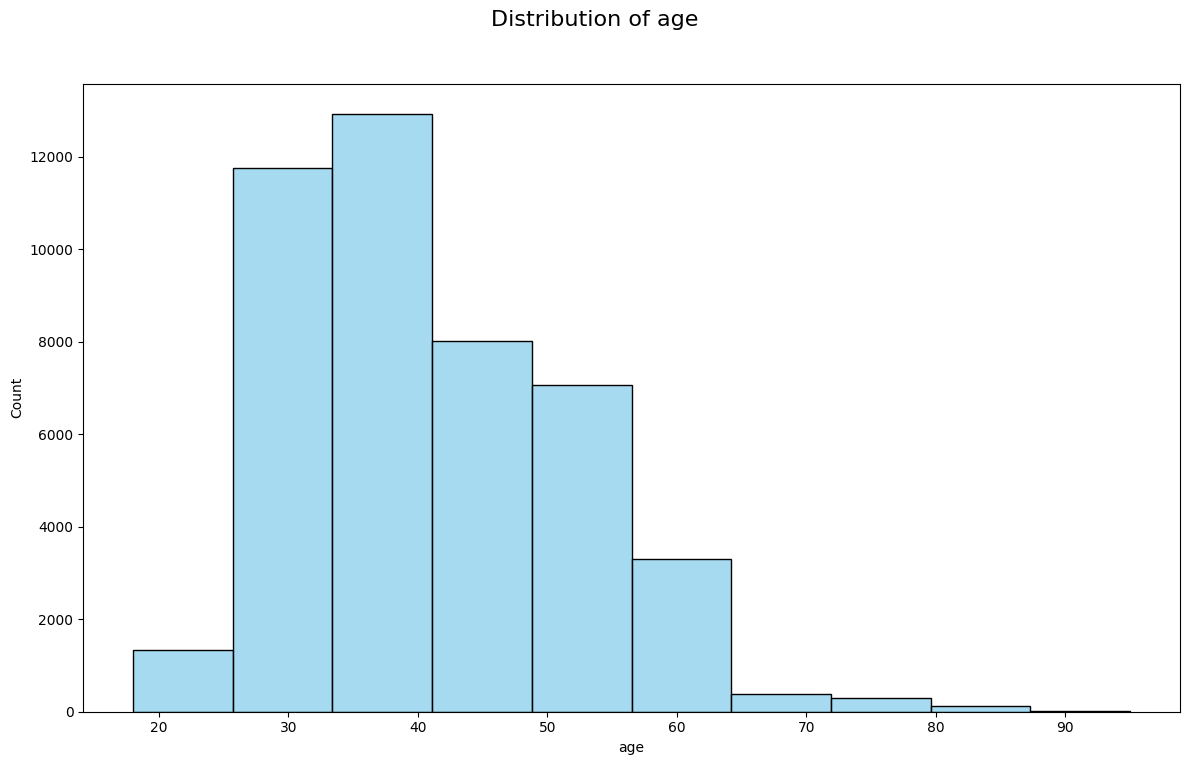

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


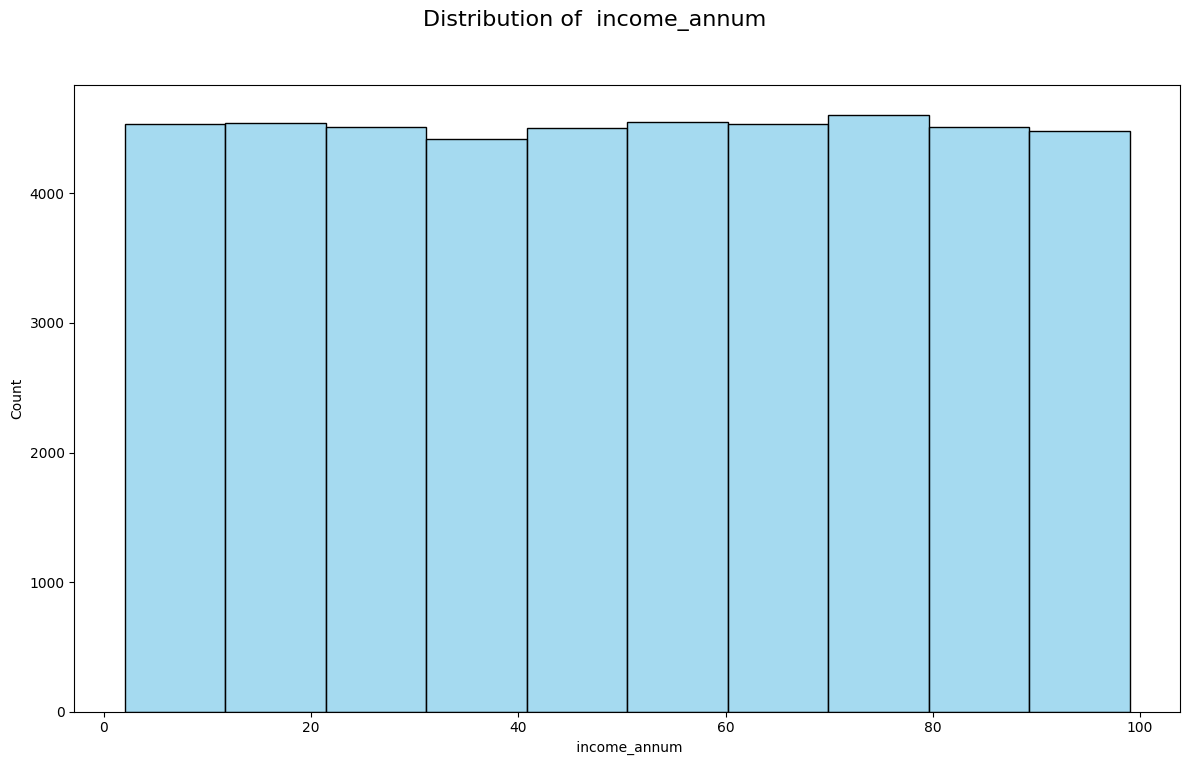

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


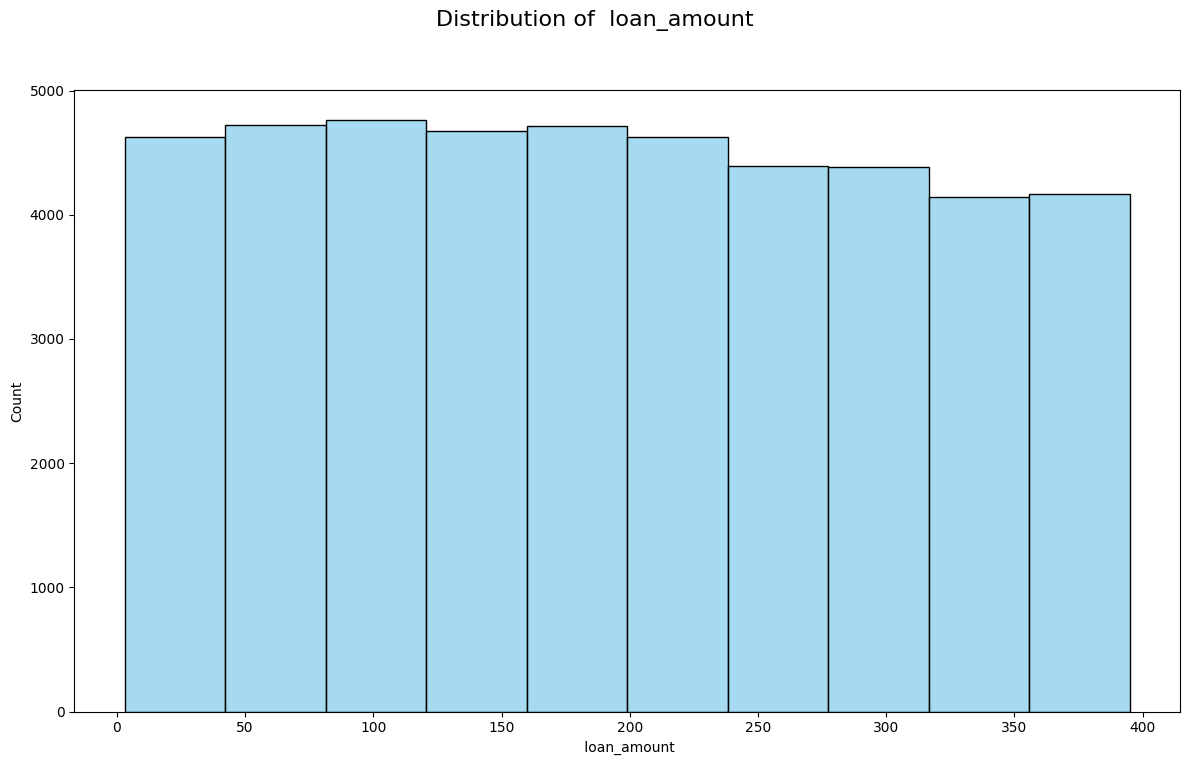

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


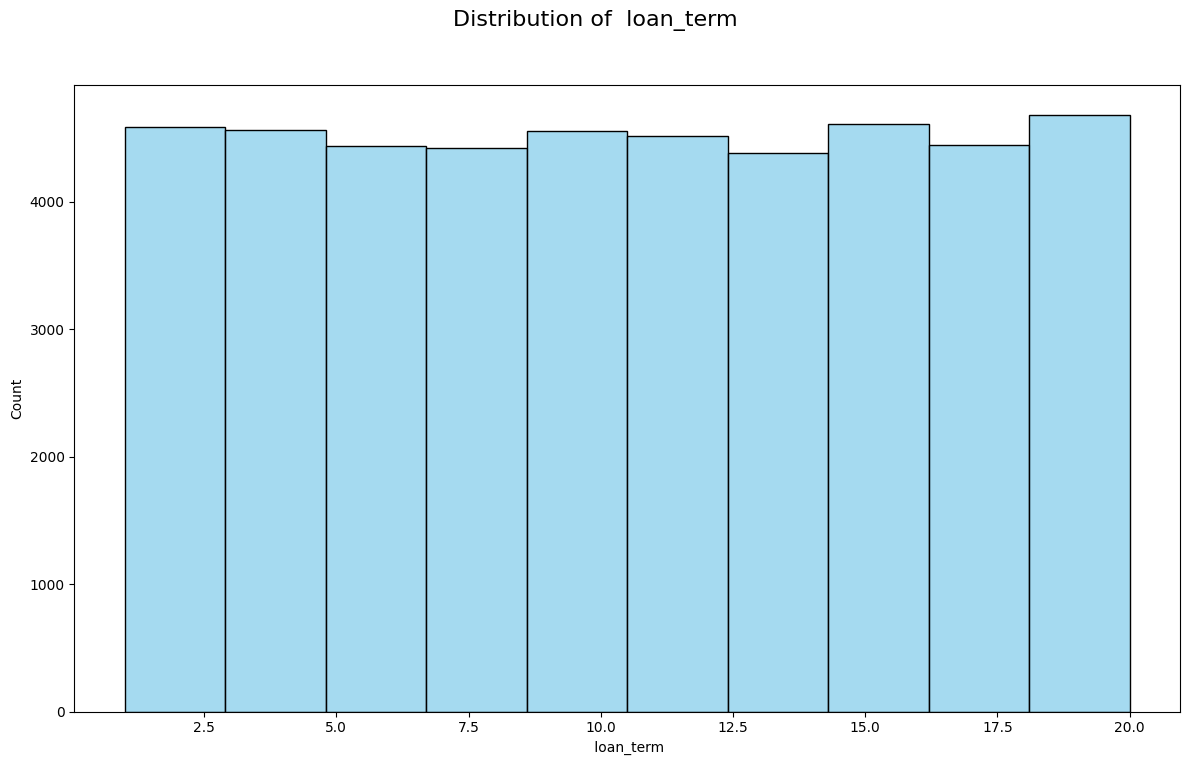

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


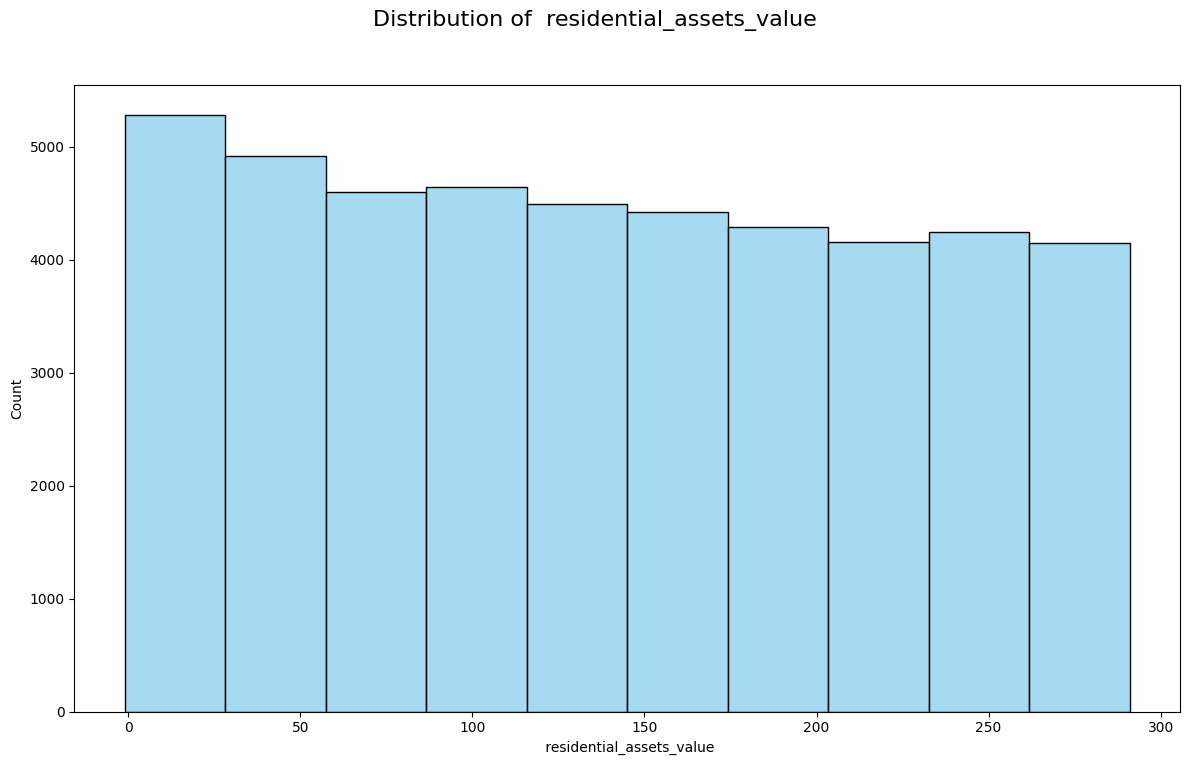

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


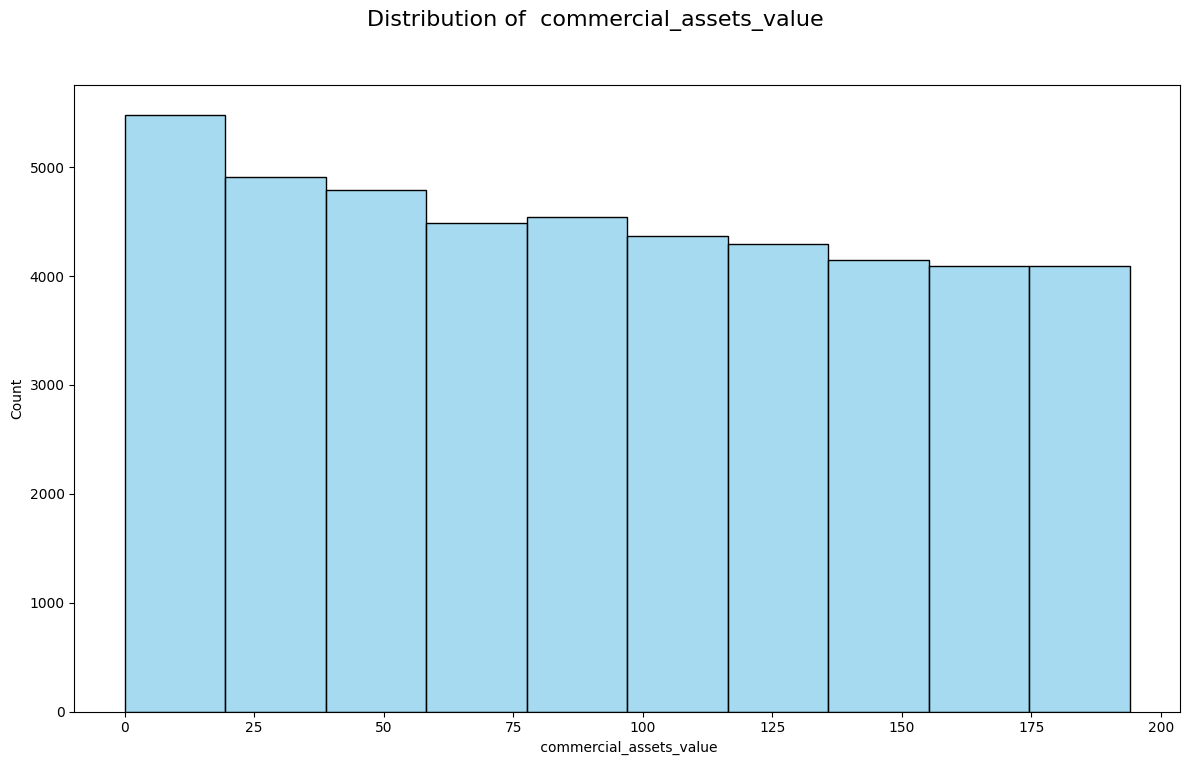

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


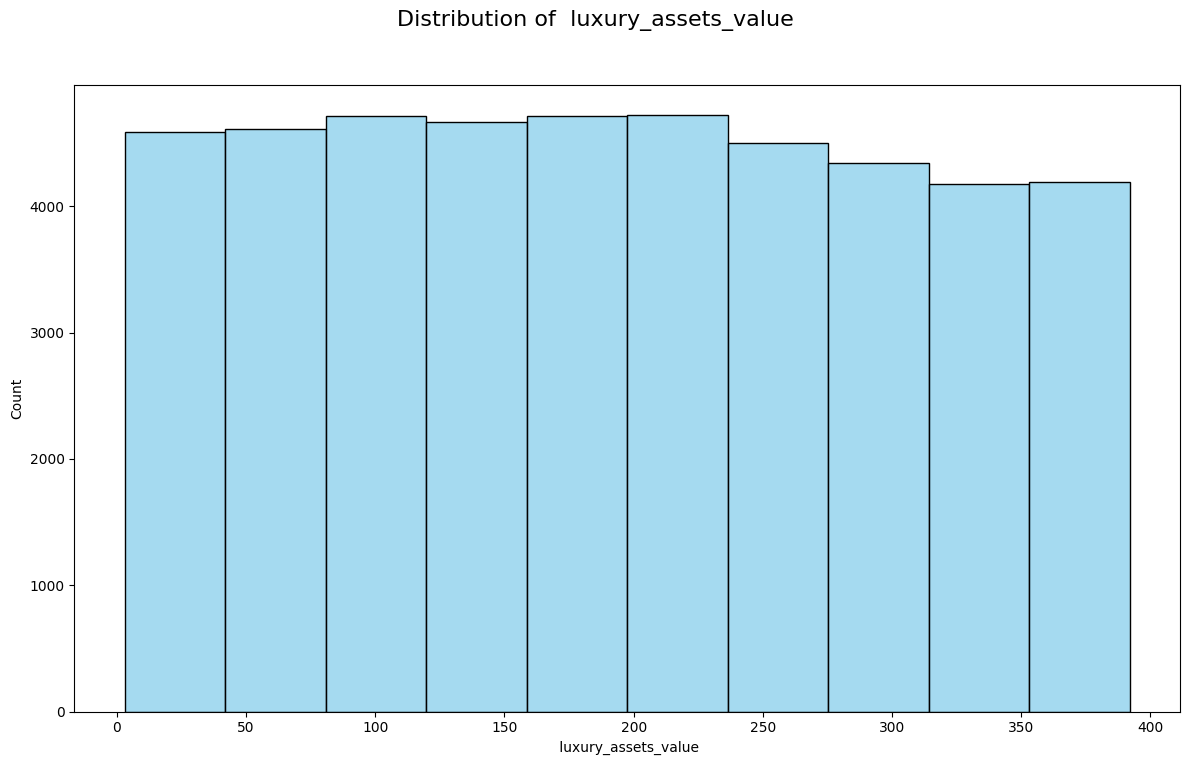

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


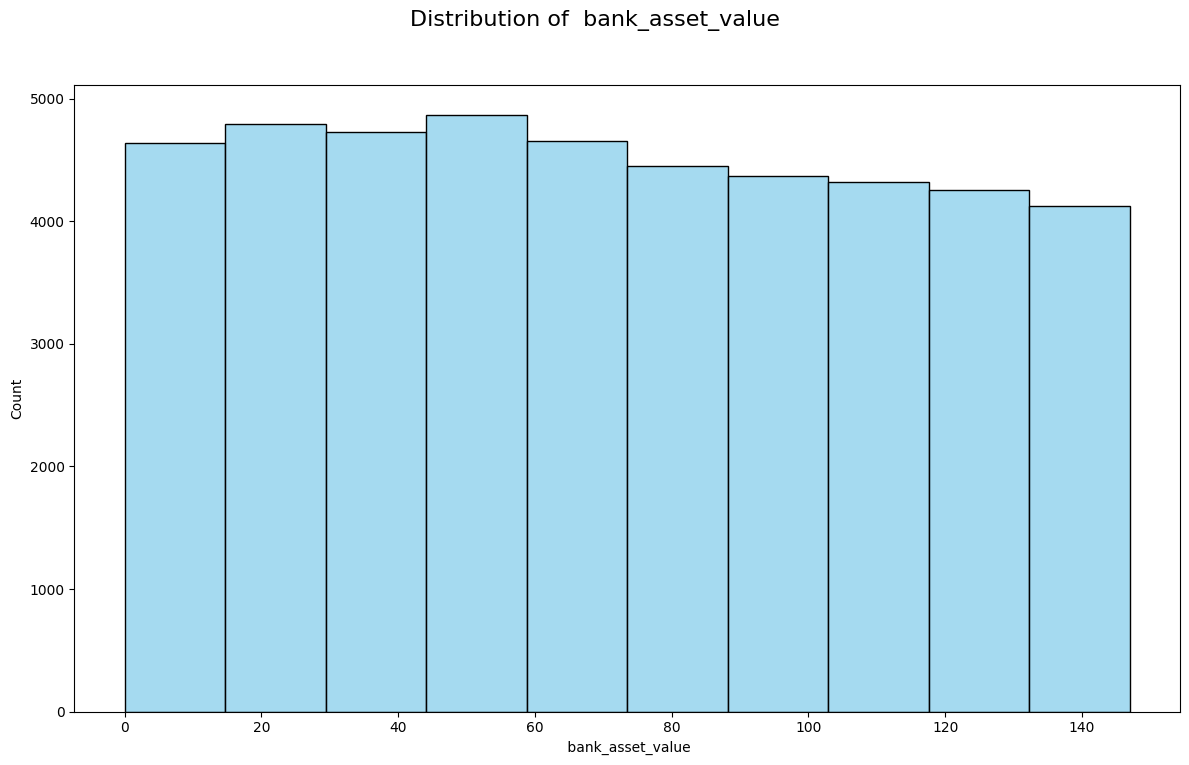

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


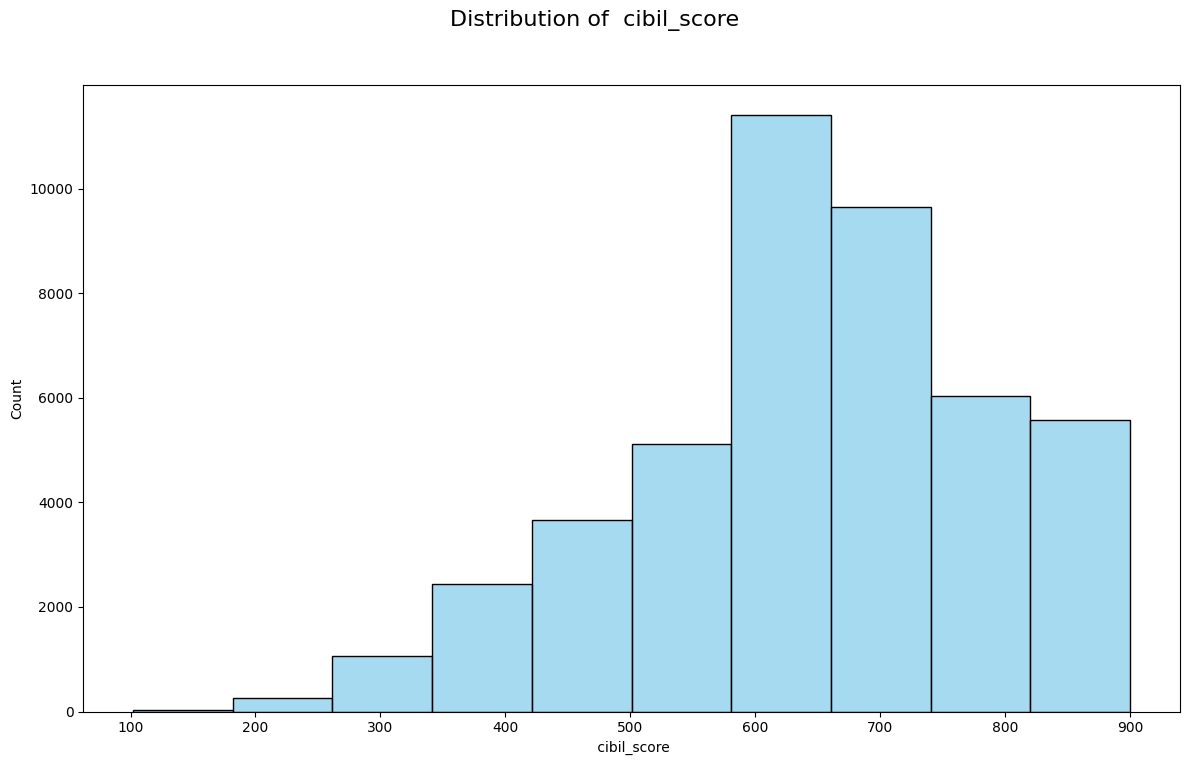

In [11]:
numerical_col=['age',' income_annum', ' loan_amount', ' loan_term',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' cibil_score']
for cols in numerical_col:
    plt.figure(figsize=(12,8))
    sns.histplot(df[cols],bins=10,color='skyblue', edgecolor='black')
    plt.suptitle(f'Distribution of {cols}',fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

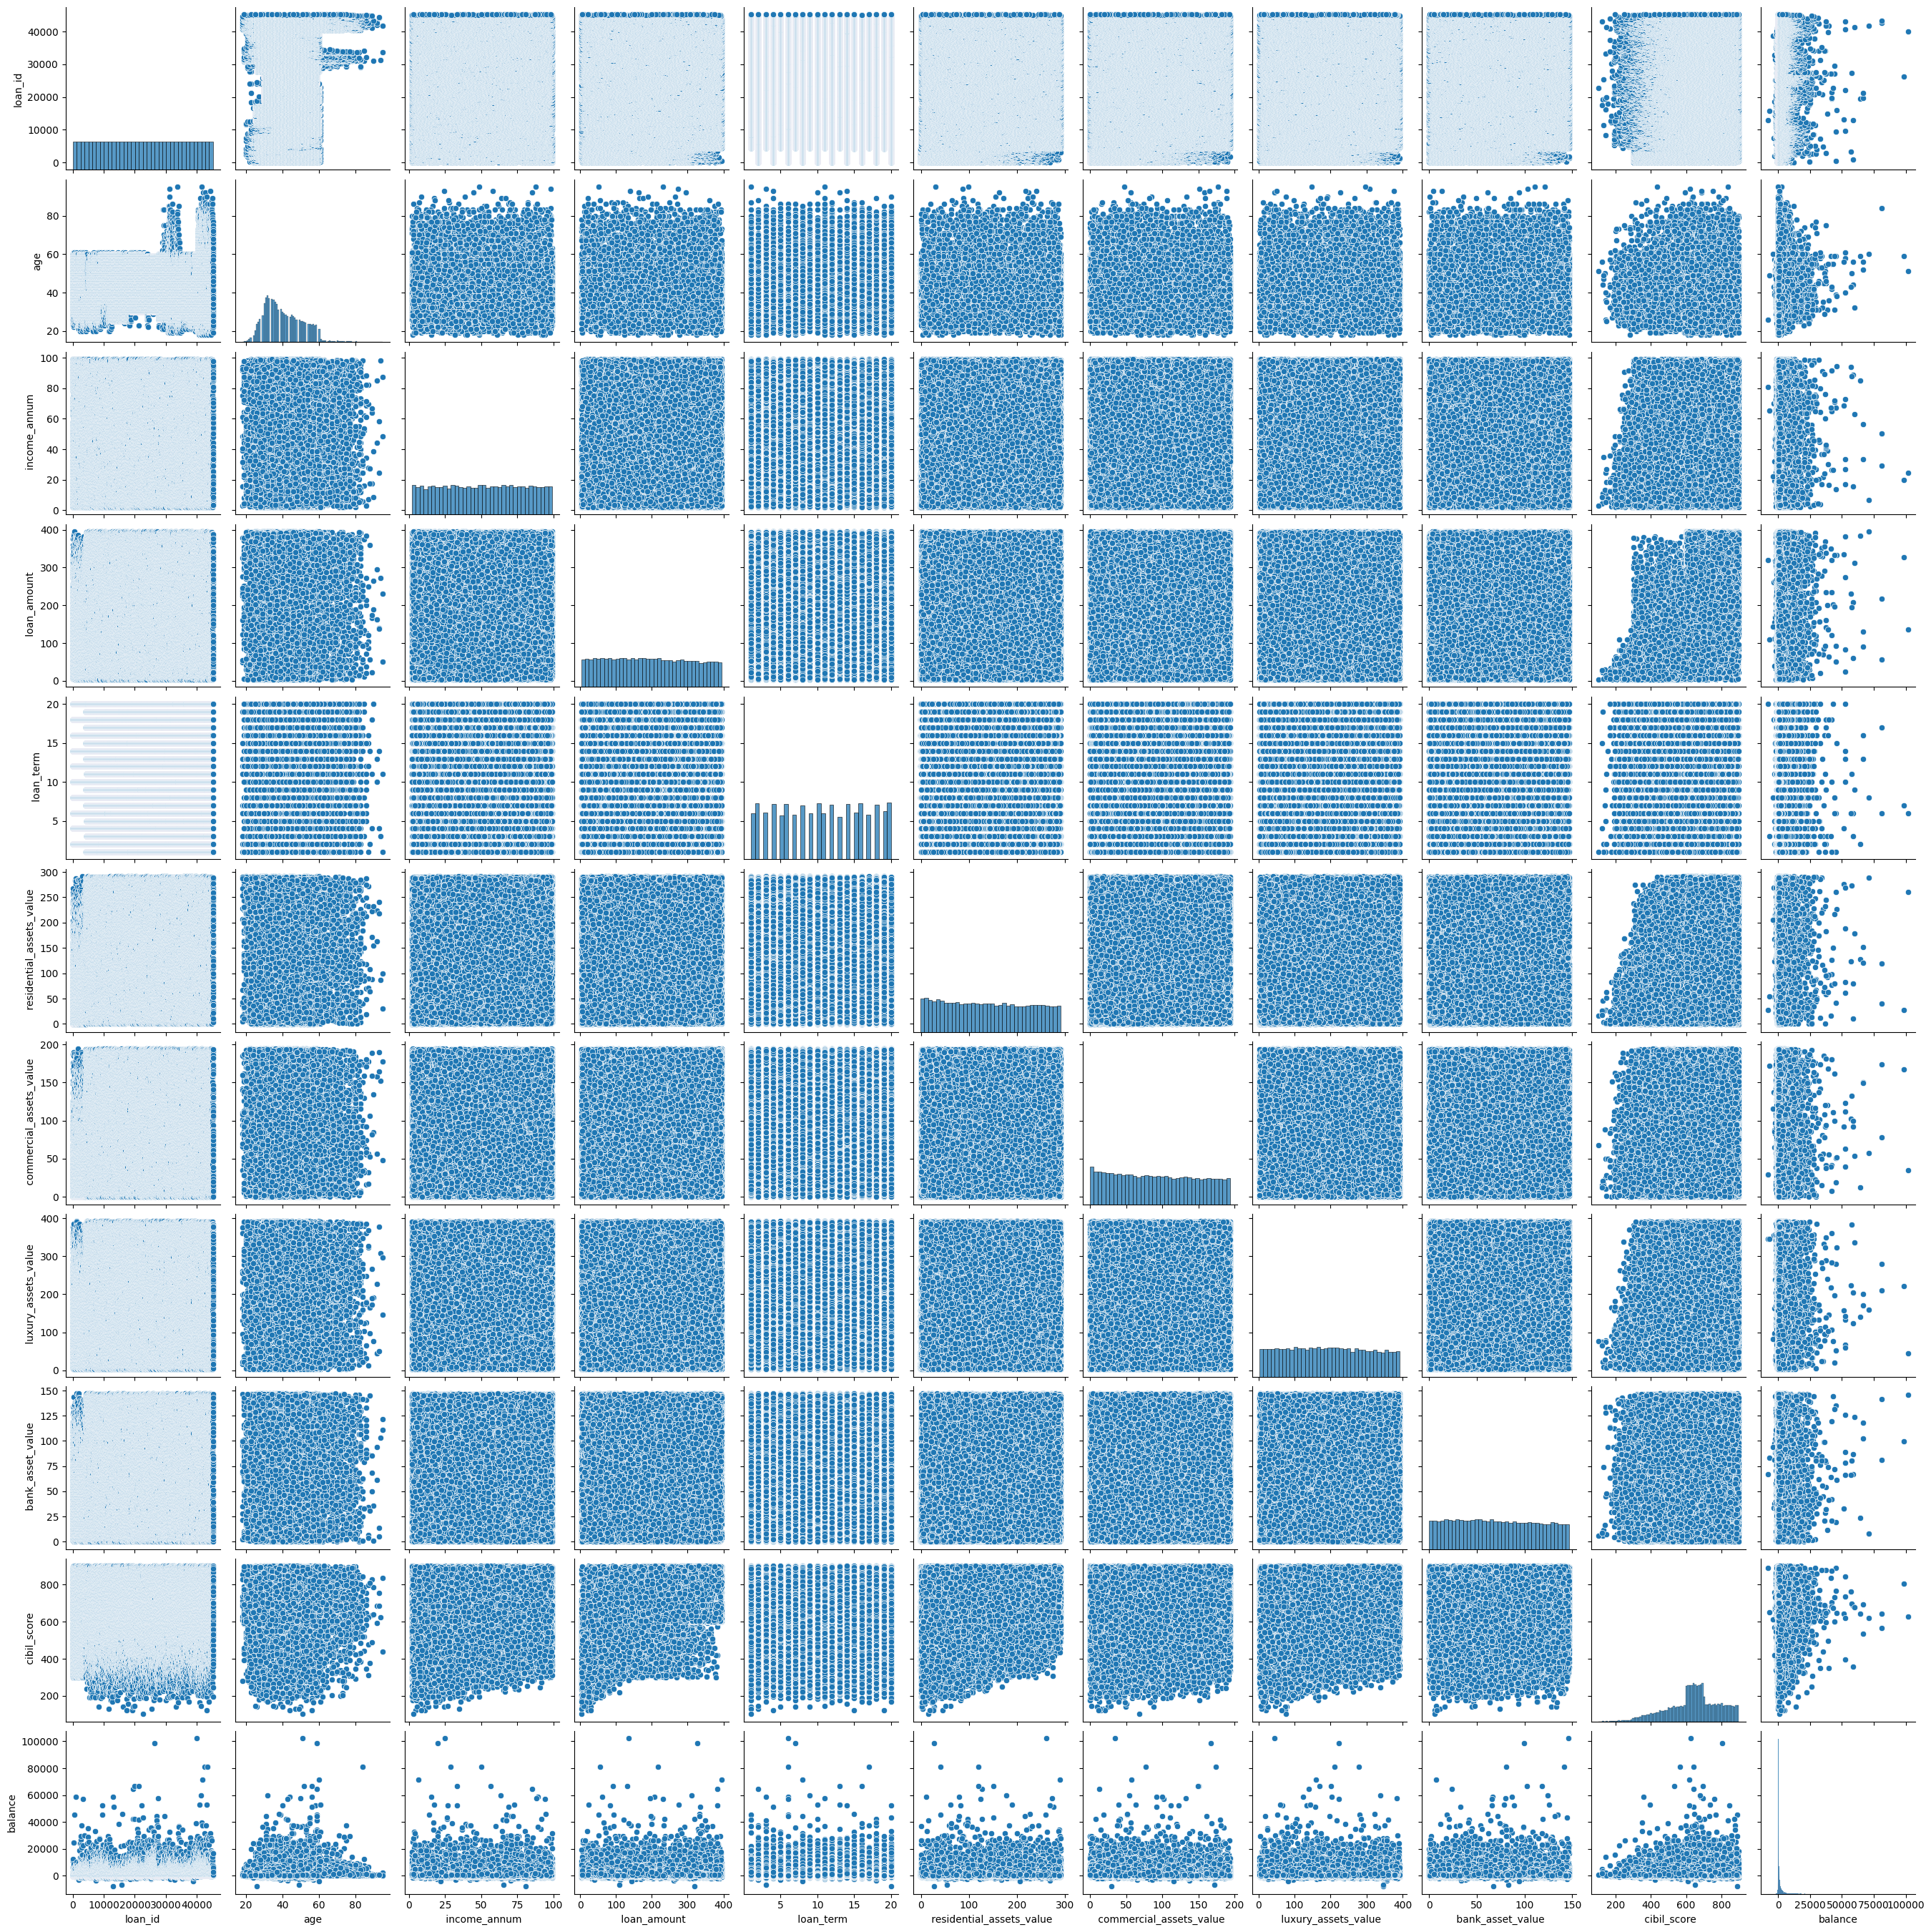

In [12]:
sns.pairplot(data=df)
plt.show()

<h1 style="background-color: #ffe4e1; color: #333; padding: 15px; border: 2px solid #ff82ab; border-radius: 15px; text-align: center; font-family: Verdana, sans-serif;">
  Exploratory Data Analysis(EDA)- Correlation Analysis
</h1>

<Axes: >

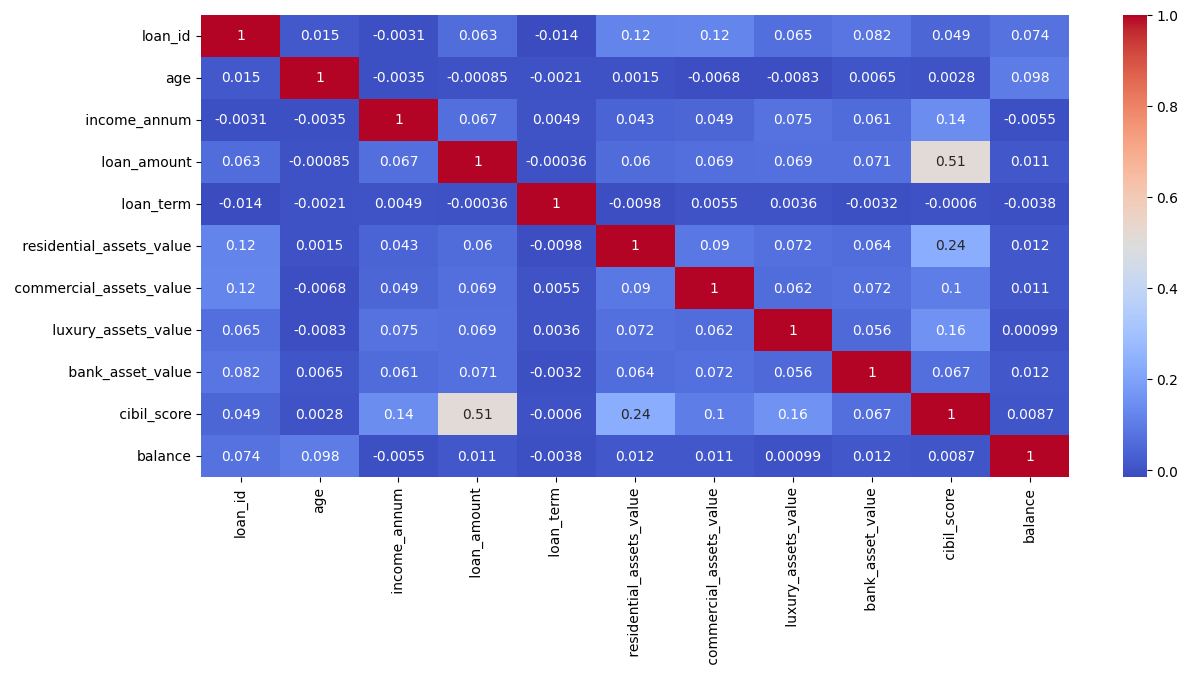

In [13]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    45211 non-null  int64  
 1   age                        45211 non-null  int64  
 2   job                        45211 non-null  object 
 3   marital                    45211 non-null  object 
 4   education                  45211 non-null  object 
 5   Gender                     45211 non-null  object 
 6   default                    45211 non-null  object 
 7   housing                    45211 non-null  object 
 8    income_annum              45211 non-null  float64
 9    loan_amount               45211 non-null  float64
 10   loan_term                 45211 non-null  int64  
 11   residential_assets_value  45211 non-null  float64
 12   commercial_assets_value   45211 non-null  float64
 13   luxury_assets_value       45211 non-null  flo

In [15]:
df

loan_id  age           job   marital  education  Gender default  \
0            1   58    management   married   tertiary  Female      no   
1            2   44    technician    single  secondary  Female      no   
2            3   33  entrepreneur   married  secondary  Female      no   
3            4   47   blue-collar   married    unknown    Male      no   
4            5   33       unknown    single    unknown  Female      no   
...        ...  ...           ...       ...        ...     ...     ...   
45206    45207   51    technician   married   tertiary  Female      no   
45207    45208   71       retired  divorced    primary  Female      no   
45208    45209   72       retired   married  secondary  Female      no   
45209    45210   57   blue-collar   married  secondary  Female      no   
45210    45211   37  entrepreneur   married  secondary  Female      no   

      housing   income_annum   loan_amount   loan_term  \
0         yes       96.00000     299.00000          12   
1         yes       41.00000     122.00000           8   
2         yes       91.00000     297.00000          20   
3         yes       82.00000     307.00000           8   
4          no       98.00000     242.00000          20   
...       ...            ...           ...         ...   
45206      no       68.04720       4.76733           2   
45207      no       70.36170      57.67923          17   
45208      no       17.41390     150.39408           3   
45209      no       60.45848     375.63558          18   
45210      no       97.85458     199.71609           1   

        residential_assets_value   commercial_assets_value  \
0                       24.00000                 176.00000   
1                       27.00000                  22.00000   
2                       71.00000                  45.00000   
3                      182.00000                  33.00000   
4                      124.00000                  82.00000   
...                          ...                       ...   
45206                  219.49696                 160.62378   
45207                  114.90721                 161.41821   
45208                   21.28640                  46.79178   
45209                  141.86322                 172.66281   
45210                  176.15323                  38.37329   

        luxury_assets_value   bank_asset_value   cibil_score  loan_status  \
0                 227.00000           80.00000           778     Approved   
1                  88.00000           33.00000           417     Rejected   
2                 333.00000          128.00000           506     Rejected   
3                 233.00000           79.00000           467     Rejected   
4                 294.00000           50.00000           382     Rejected   
...                     ...                ...           ...          ...   
45206              69.28734           46.84139           501     Rejected   
45207             219.43414           51.31647           558     Rejected   
45208             353.80397           99.75071           532     Rejected   
45209             212.58587           15.29223           826     Approved   
45210              38.47627          108.58236           764     Approved   

       balance  
0         2143  
1           29  
2            2  
3         1506  
4            1  
...        ...  
45206      825  
45207     1729  
45208     5715  
45209      668  
45210     2971  

[45211 rows x 18 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    45211 non-null  int64  
 1   age                        45211 non-null  int64  
 2   job                        45211 non-null  object 
 3   marital                    45211 non-null  object 
 4   education                  45211 non-null  object 
 5   Gender                     45211 non-null  object 
 6   default                    45211 non-null  object 
 7   housing                    45211 non-null  object 
 8    income_annum              45211 non-null  float64
 9    loan_amount               45211 non-null  float64
 10   loan_term                 45211 non-null  int64  
 11   residential_assets_value  45211 non-null  float64
 12   commercial_assets_value   45211 non-null  float64
 13   luxury_assets_value       45211 non-null  flo

****<h1 style="background-color: #ffe4e1; color: #333; padding: 15px; border: 2px solid #ff82ab; border-radius: 15px; text-align: center; font-family: Verdana, sans-serif;">
   Data Preprocessing
</h1>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    45211 non-null  int64  
 1   age                        45211 non-null  int64  
 2   job                        45211 non-null  object 
 3   marital                    45211 non-null  object 
 4   education                  45211 non-null  object 
 5   Gender                     45211 non-null  object 
 6   default                    45211 non-null  object 
 7   housing                    45211 non-null  object 
 8    income_annum              45211 non-null  float64
 9    loan_amount               45211 non-null  float64
 10   loan_term                 45211 non-null  int64  
 11   residential_assets_value  45211 non-null  float64
 12   commercial_assets_value   45211 non-null  float64
 13   luxury_assets_value       45211 non-null  flo

In [18]:
df=pd.get_dummies(df, columns=['job', 'marital', 'education'])

In [19]:
column_encode=['Gender', 'default','housing',' loan_status']

In [20]:
le=LabelEncoder()

In [21]:
for column in column_encode:
    df[column]=le.fit_transform(df[column])
    

In [22]:
df.head()

loan_id  age  Gender  default  housing   income_annum   loan_amount  \
0        1   58       0        0        1           96.0         299.0   
1        2   44       0        0        1           41.0         122.0   
2        3   33       0        0        1           91.0         297.0   
3        4   47       1        0        1           82.0         307.0   
4        5   33       0        0        0           98.0         242.0   

    loan_term   residential_assets_value   commercial_assets_value  ...  \
0          12                       24.0                     176.0  ...   
1           8                       27.0                      22.0  ...   
2          20                       71.0                      45.0  ...   
3           8                      182.0                      33.0  ...   
4          20                      124.0                      82.0  ...   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0           False           False        False             False   
1            True           False        False             False   
2           False           False        False             False   
3           False           False        False             False   
4           False           False         True             False   

   marital_married  marital_single  education_primary  education_secondary  \
0             True           False              False                False   
1            False            True              False                 True   
2             True           False              False                 True   
3             True           False              False                False   
4            False            True              False                False   

   education_tertiary  education_unknown  
0                True              False  
1               False              False  
2               False              False  
3               False               True  
4               False               True  

[5 rows x 34 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    45211 non-null  int64  
 1   age                        45211 non-null  int64  
 2   Gender                     45211 non-null  int64  
 3   default                    45211 non-null  int64  
 4   housing                    45211 non-null  int64  
 5    income_annum              45211 non-null  float64
 6    loan_amount               45211 non-null  float64
 7    loan_term                 45211 non-null  int64  
 8    residential_assets_value  45211 non-null  float64
 9    commercial_assets_value   45211 non-null  float64
 10   luxury_assets_value       45211 non-null  float64
 11   bank_asset_value          45211 non-null  float64
 12   cibil_score               45211 non-null  int64  
 13   loan_status               45211 non-null  int

<h1 style="background-color: #ffe4e1; color: #333; padding: 15px; border: 2px solid #ff82ab; border-radius: 15px; text-align: center; font-family: Verdana, sans-serif;">
    Train & test the split data
</h1>

In [24]:
X=df.drop(['loan_id',' loan_status'],axis=1)
y=df[' loan_status']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=99)

<h1 style="background-color: #ffe4e1; color: #333; padding: 15px; border: 2px solid #ff82ab; border-radius: 15px; text-align: center; font-family: Verdana, sans-serif;">
   Using various Algorithms to choose right Algorithm
</h1>

In [26]:
models={
    "Logistic Regression":LogisticRegression(max_iter=10000,random_state=42),
    "Random Forest":RandomForestClassifier(n_estimators=100,random_state=42),
    "K-nearest Neighbour":KNeighborsClassifier(),
    "Support Vector Machine":SVC()
}

In [27]:
def evaluate_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1
    

In [28]:
results=[]
for name,model in models.items():
    accuracy,precision,recall,f1=evaluate_model(model, X_train, y_train,X_test, y_test)
    results.append({
        "Model":name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })


In [29]:
results_df=pd.DataFrame(results)
results_df

Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.973861   0.973800  0.973861  0.973777
1           Random Forest  0.994035   0.994128  0.994035  0.994049
2     K-nearest Neighbour  0.963673   0.963550  0.963673  0.963570
3  Support Vector Machine  0.969169   0.969156  0.969169  0.968987


Best Model (Machine Learning):
Model        Random Forest
Accuracy          0.994035
Precision         0.994128
Recall            0.994035
F1-Score          0.994049
Name: 1, dtype: object


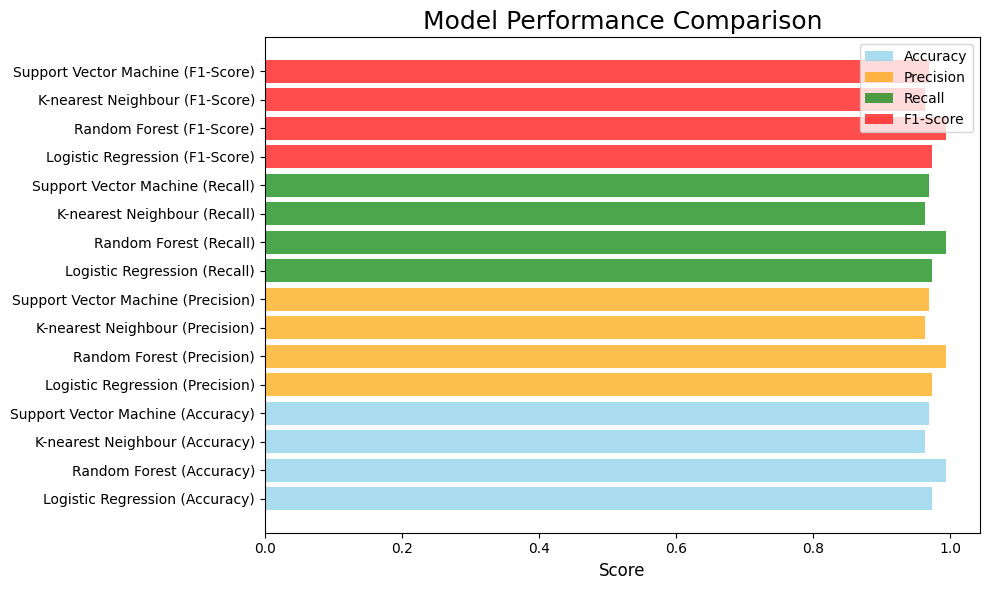


Optimal Model based on Accuracy: Random Forest with Accuracy = 0.9940


In [30]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")